如图 3-1 所示，逻辑结构可分为“线性”和“非线性”两大类。线性结构比较直观，指数据在逻辑关系上呈线性排列；非线性结构则相反，呈非线性排列。

线性数据结构：数组、链表、栈、队列、哈希表，元素之间是一对一的顺序关系。
非线性数据结构：树、堆、图、哈希表。
非线性数据结构可以进一步划分为树形结构和网状结构。

树形结构：树、堆、哈希表，元素之间是一对多的关系。
网状结构：图，元素之间是多对多的关系。

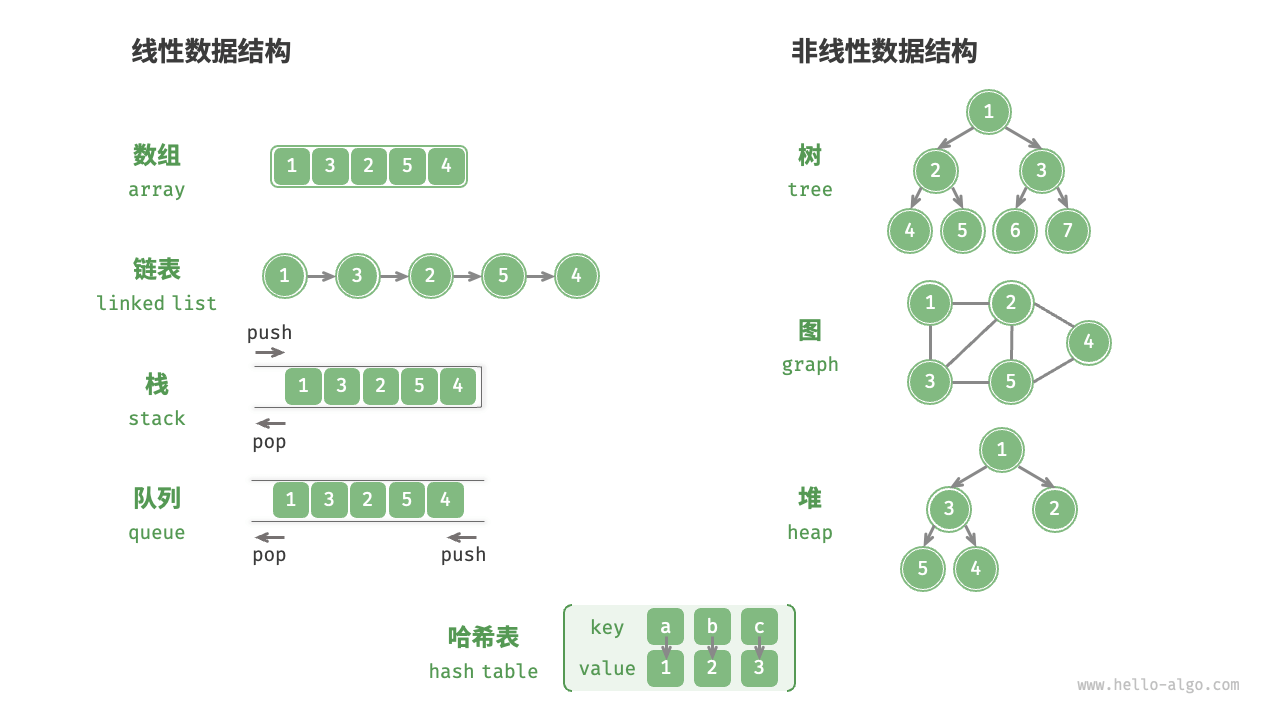

## 3.1物理结构：连续与分散
当算法程序运行时，正在处理的数据主要存储在内存中。
系统通过内存地址来访问目标位置的数据。
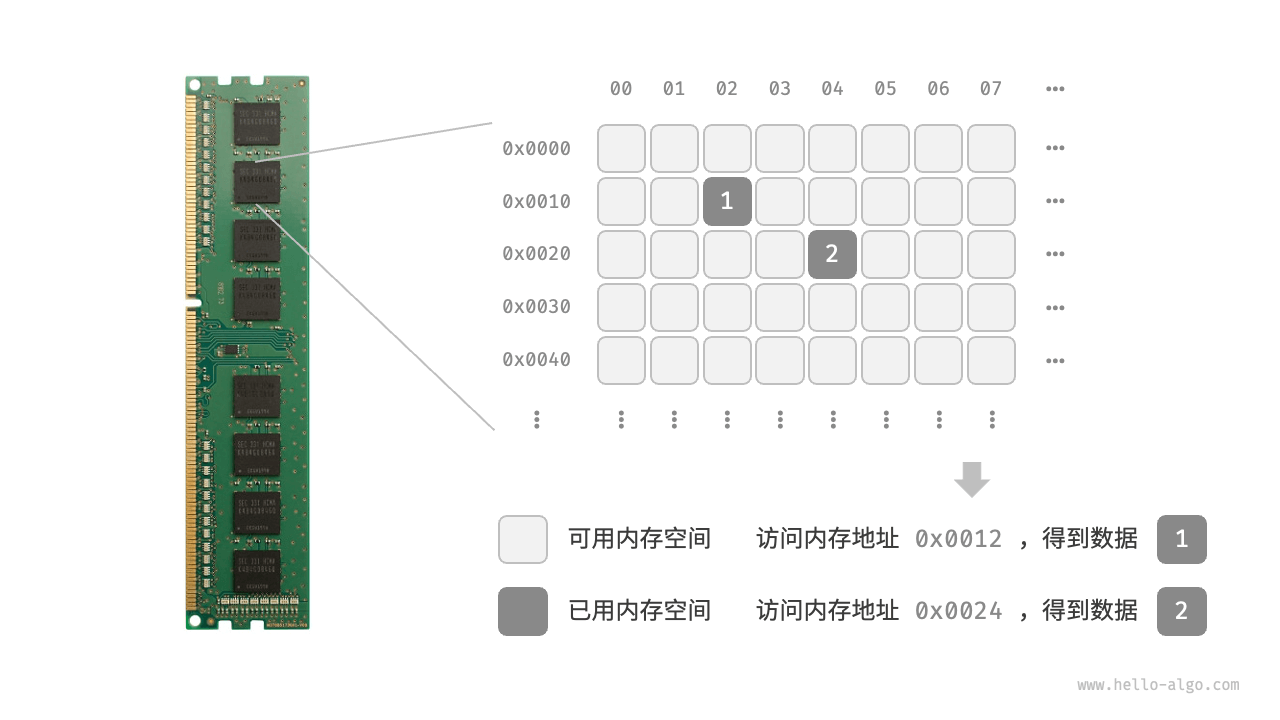

内存是所有程序的共享资源，当某块内存被某个程序占用时，则通常无法被其他程序同时使用了。因此在数据结构与算法的设计中，内存资源是一个重要的考虑因素。比如，算法所占用的内存峰值不应超过系统剩余空闲内存；如果缺少连续大块的内存空间，那么所选用的数据结构必须能够存储在分散的内存空间内。
如图 3-3 所示，物理结构反映了数据在计算机内存中的存储方式，可分为连续空间存储（数组）和分散空间存储（链表）。物理结构从底层决定了数据的访问、更新、增删等操作方法，两种物理结构在时间效率和空间效率方面呈现出互补的特点。
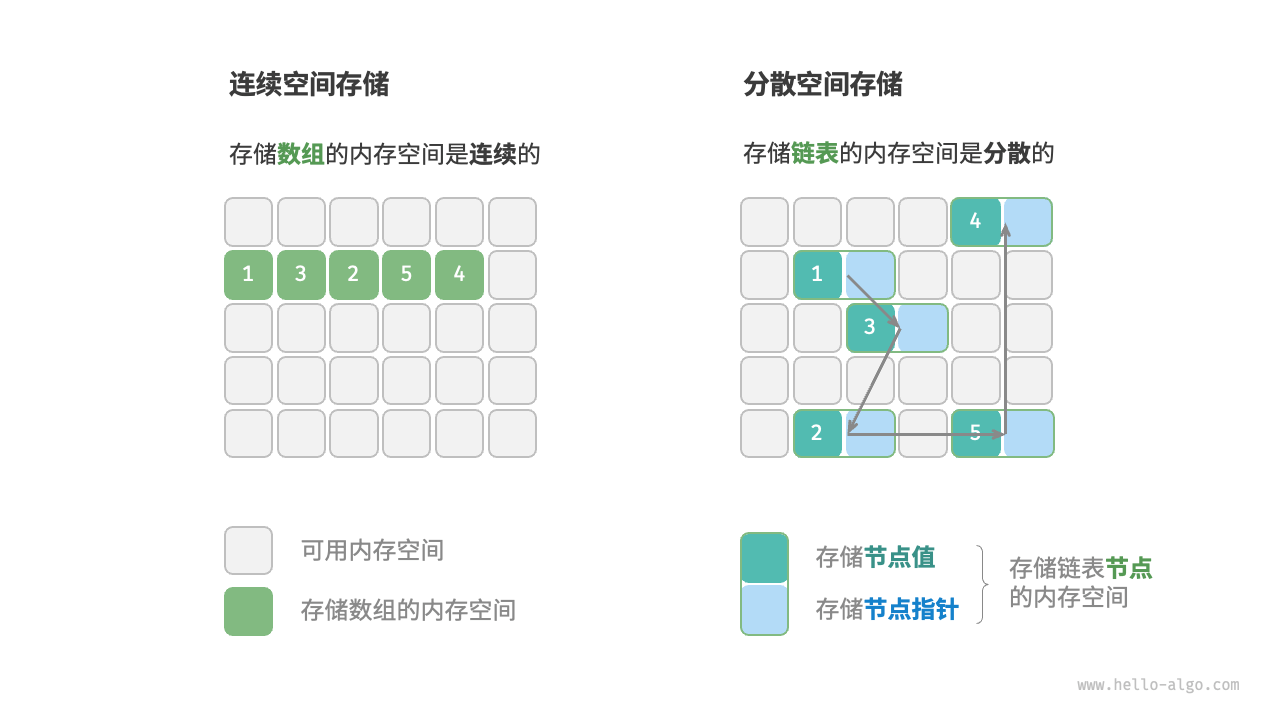
值得说明的是，所有数据结构都是基于数组、链表或二者的组合实现的。例如，栈和队列既可以使用数组实现，也可以使用链表实现；而哈希表的实现可能同时包含数组和链表。
- 基于数组可实现：栈、队列、哈希表、树、堆、图、矩阵、张量（维度的数组）等。
- 基于链表可实现：栈、队列、哈希表、树、堆、图等。

链表在初始化后，仍可以在程序运行过程中对其长度进行调整，因此也称“动态数据结构”。数组在初始化后长度不可变，因此也称“静态数据结构”。值得注意的是，数组可通过重新分配内存实现长度变化，从而具备一定的动态性。

## 3.2 基本数据类型
基本数据类型是CPU可以直接进行运算的类型，在算法中直接被使用，主要包括以下几种：
- 整数类型 byte、short、int、long 。
- 浮点数类型 float、double ，用于表示小数。
- 字符类型 char ，用于表示各种语言的字母、标点符号甚至表情符号等。
- 布尔类型 bool ，用于表示“是”与“否”判断。
**基本数据类型以而精致的形式存储在计算机中**，一个二进制位就是1比特，在现代操作系统中，1字节byte由8比特bit组成。
基本数据类型与数据结构之间有什么联系呢？我们知道，数据结构是在计算机中组织与存储数据的方式。这句话的主语是“结构”而非“数据”。

如果想表示“一排数字”，我们自然会想到使用数组。这是因为数组的线性结构可以表示数字的相邻关系和顺序关系，但至于存储的内容是整数 int、小数 float 还是字符 char ，则与“数据结构”无关。

换句话说，基本数据类型提供了数据的“内容类型”，而数据结构提供了数据的“组织方式”。例如以下代码，我们用相同的数据结构（数组）来存储与表示不同的基本数据类型，包括 int、float、char、bool 等。

In [1]:
// 使用多种基本数据类型来初始化数组
var numbers = [5]int{}
var decimals = [3]float64{}
var characters = [5]byte{}
var bools = [5]bool{}

## 3.3 数字编码*
### 3.3.1 原码，反码和补码
在上一节的表格中，我们可以发现所有的整数类型能表示的负数都比正数多一个，比如byte的取值范围是[-128,127]。这个现象比较反直觉，内在原因涉及原码补码反码的知识。
首先必须要指出**数字是以“补码”的形式存储在计算机中的**, 
- 原码：我们将数字的二进制表示的最高位视为符号位，其中0表示正数，1表示负数，其余位表示数字的值。
- 反码：正数的反码与其原码相同，负数的反码是对其原码除符号位外的所有位取反。
- 补码：正数的补码与其原码相同，负数的补码是在其反码的基础上加1。
图3-4展示了原码反码补码之间的转换方法：
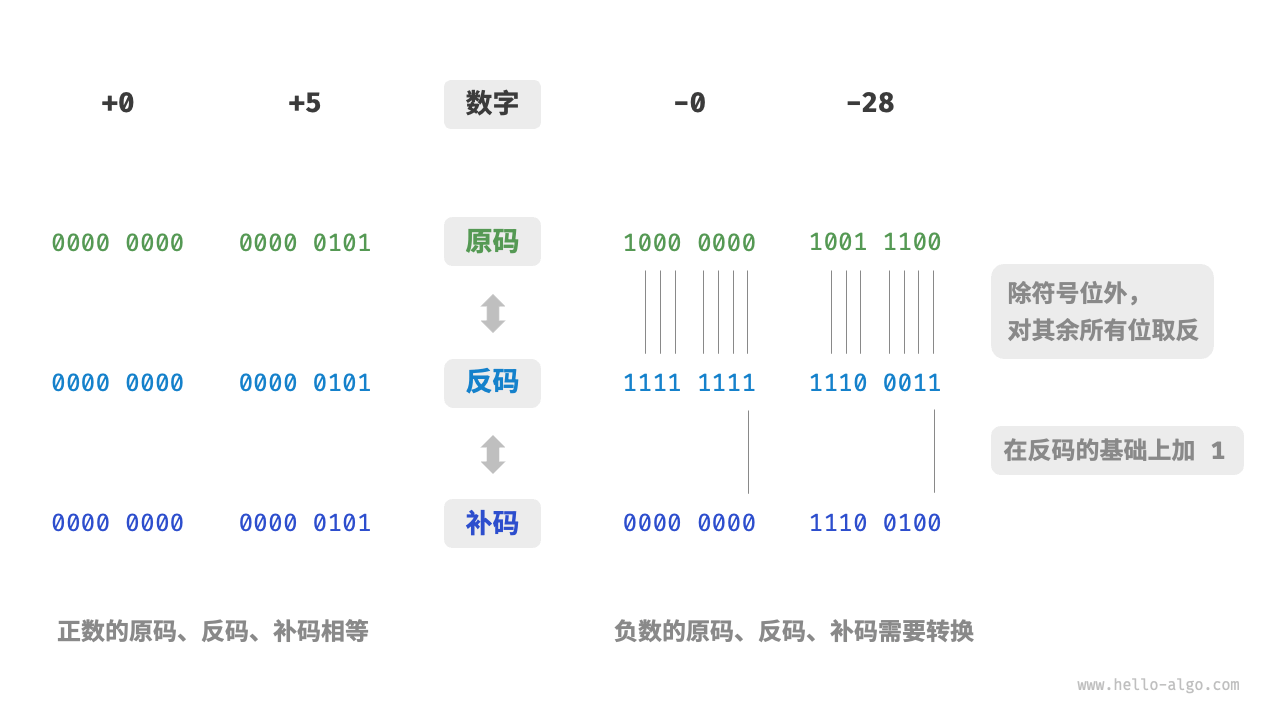

原码具有局限性比如负数的原码不能直接用于运算。所以我们引入了反码：
此外**数字零的原码有+0和-0两种表示方式**
+0---0000 0000 ; -0---1000 0000
与原码一眼，反码也存在正负零歧义问题，因此计算机进一步引入了补码。
注意**-0的补码为0000 0000，与+0的补码相同**,这意味着补码表示中只存在一个零，歧义的问题因此得以解决。
现在我们来解决最后一个疑问：为什么byte的取值范围中多出来了一个负数是-128，
因为补码1000 0000 是一个例外其对应的原码是0000 0000这明显是错的，计算机规定这个特殊的补码1000 0000代表-128.实际上-1+（-127）在补码的计算下结构就是-128.
**注意：计算机内部的硬件电路主要是基于加法运算设计的**
因为加法运算实现上比其他运算简单且容易进行并行化处理，运算速度更快。
通过将加法与一些基本逻辑运算结合，计算机能够实现各种其他的数学运算。
### 3.3.2 浮点数编码
我们可以发现int 和 float 长度相同，都是4字节，但为什么float的取值范围远大于int？这看起来非常反直觉，因为float还需要表示小数，取值范围应该变小才对。
实际上，这是因为浮点数float采用了不同的表示方式。一个32比特长度的二进制数为：
$$b_{31}b_{30}b_{29} \dots b_2b_1b_0$$
根据 IEEE 754 标准，32-bit 长度的 float 由以下三个部分构成。

* **符号位 S**：占 1 位，对应 $b_{31}$。
* **指數位 E**：占 8 位，对应 $b_{30}b_{29} \dots b_{23}$。
* **分数位 N**：占 23 位，对应 $b_{22}b_{21} \dots b_0$。

二进制制 `float` 对应的值计算方法为：

$$
val = (-1)^{b_{31}} \times 2^{(b_{30}b_{29} \dots b_{23})_2 - 127} \times (1.b_{22}b_{21} \dots b_0)_2
$$

转化到十进制下的计算公式为：

$$
val = (-1)^S \times 2^{E-127} \times (1 + N)
$$

其中各项的取值范围为：

$$
S \in \{0, 1\}, \quad E \in \{1, 2, \dots, 254\}
$$

$$
(1 + N) = \left(1 + \sum_{i=1}^{23} b_{23-i} 2^{-i}\right) \subset [1, 2 - 2^{-23}]
$$

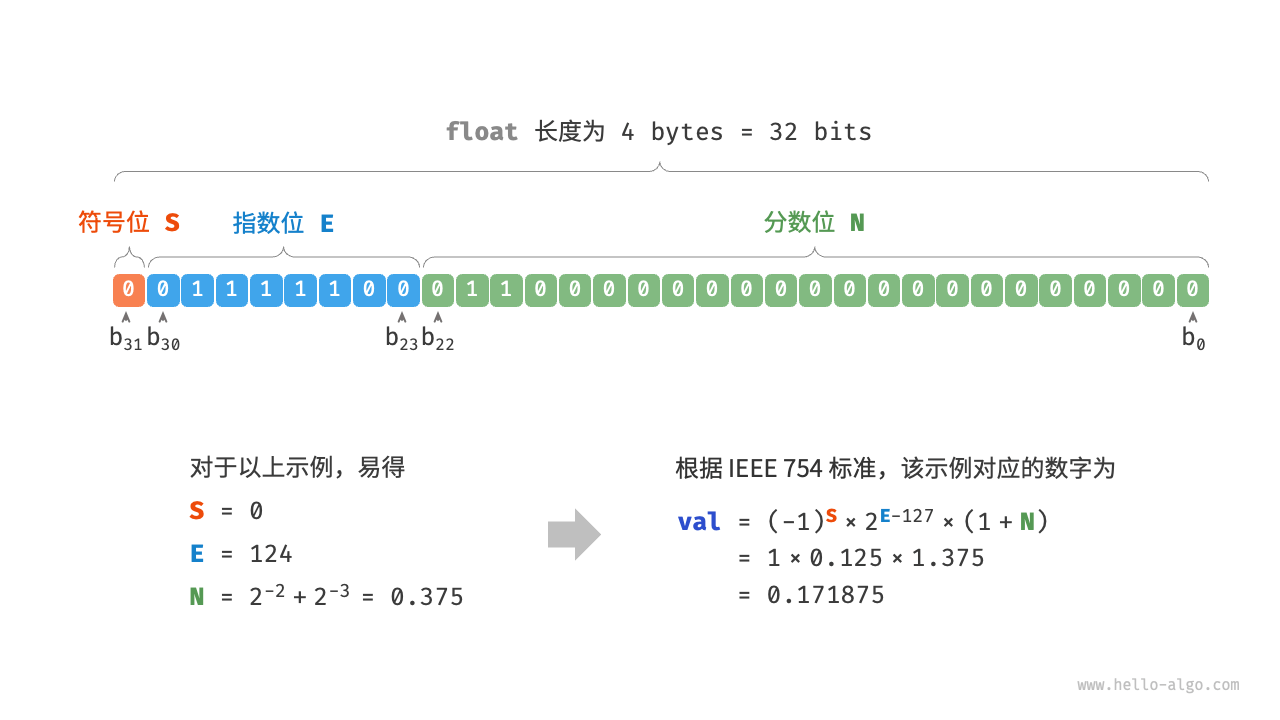
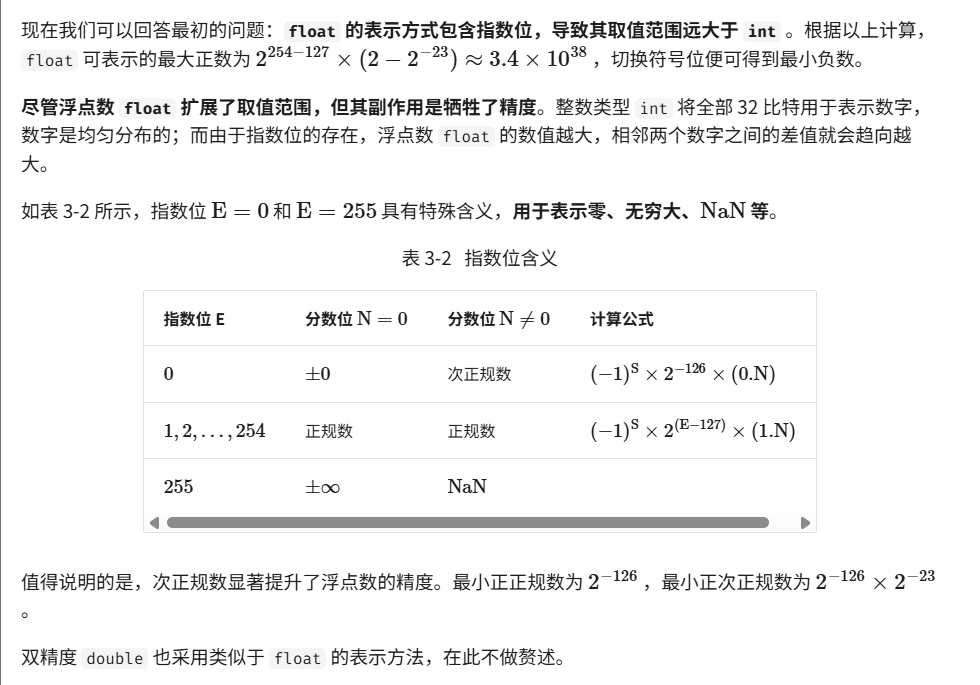

## 3.4 字符编码*